In [ ]:
import sqlite3

# Connect to (or create) the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data =  [
    ('Apple', 10, 0.5),
    ('Banana', 15, 0.3),
    ('Orange', 8, 0.6),
    ('Apple', 7, 0.5),
    ('Banana', 10, 0.3)
]


cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [ ]:
import sqlite3

# Connect to (or create) the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop the old sales table if it exists
cursor.execute("DROP TABLE IF EXISTS sales")

# Now create the new table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ('Apple', 10, 0.5),
    ('Banana', 15, 0.3),
    ('Orange', 8, 0.6),
    ('Apple', 7, 0.5),
    ('Banana', 10, 0.3)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


In [ ]:
import os

if os.path.exists("sales_data.db"):
    os.remove("sales_data.db")


In [ ]:
conn = sqlite3.connect("sales_data.db")


In [ ]:
conn.close()


In [ ]:
import os

if os.path.exists("sales_data.db"):
    os.remove("sales_data.db")
    print("Database deleted.")
else:
    print("Database file not found.")


In [ ]:
try:
    conn.close()
except:
    pass  # if conn doesn't exist yet, skip


In [1]:
import os

if os.path.exists("sales_data.db"):
    os.remove("sales_data.db")
    print("Database deleted.")
else:
    print("No database file found.")


Database deleted.


Sales Summary:
  product  total_qty  revenue
0   Apple         17      8.5
1  Banana         25      7.5
2  Orange          8      4.8


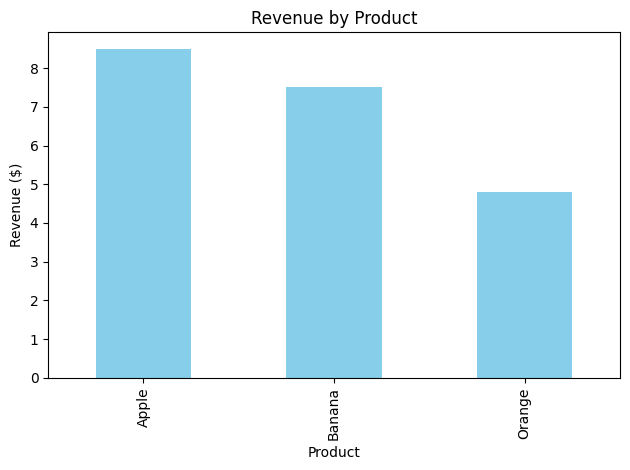

In [2]:
# Step 1: Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Create a fresh SQLite database and connect
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 3: Create the 'sales' table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 4: Insert sample data
sample_data = [
    ('Apple', 10, 0.5),
    ('Banana', 15, 0.3),
    ('Orange', 8, 0.6),
    ('Apple', 7, 0.5),
    ('Banana', 10, 0.3)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 5: Query total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

# Step 6: Display result
print("Sales Summary:")
print(df)

# Step 7: Plot bar chart for revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

# Step 8: Close the database connection
conn.close()


In [3]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>

In [4]:
sample_data = [
    ('Apple', 10, 0.5),
    ('Banana', 15, 0.3),
    ('Orange', 8, 0.6),
    ('Apple', 7, 0.5),
    ('Banana', 10, 0.3),
    ('Grapes', 12, 0.8),
    ('Pineapple', 5, 1.5),
    ('Mango', 9, 1.2),
    ('Watermelon', 3, 3.0),
    ('Grapes', 6, 0.8)
]


In [5]:
df = df.sort_values(by='revenue', ascending=False)


Sales Summary (sorted by revenue):
      product  total_qty  revenue
2      Grapes         18     14.4
3       Mango          9     10.8
6  Watermelon          3      9.0
0       Apple         17      8.5
1      Banana         25      7.5
5   Pineapple          5      7.5
4      Orange          8      4.8


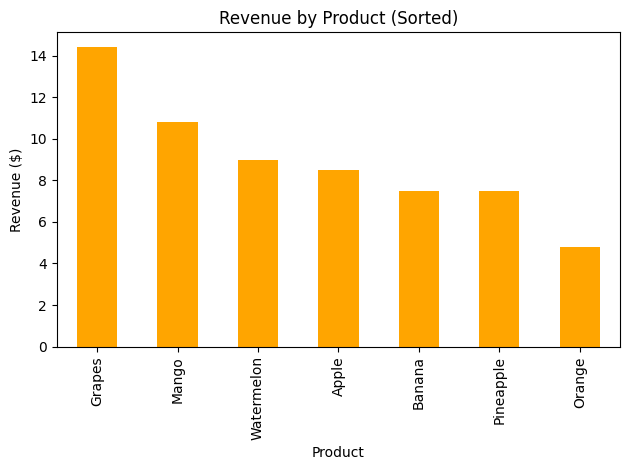

In [6]:
# Step 1: Reconnect and drop old table
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")

# Step 2: Create table again
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Add more sample data
sample_data = [
    ('Apple', 10, 0.5),
    ('Banana', 15, 0.3),
    ('Orange', 8, 0.6),
    ('Apple', 7, 0.5),
    ('Banana', 10, 0.3),
    ('Grapes', 12, 0.8),
    ('Pineapple', 5, 1.5),
    ('Mango', 9, 1.2),
    ('Watermelon', 3, 3.0),
    ('Grapes', 6, 0.8)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 4: Query with pandas and sort by revenue
import pandas as pd

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df = df.sort_values(by='revenue', ascending=False)

# Step 5: Print and plot
print("Sales Summary (sorted by revenue):")
print(df)

import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue by Product (Sorted)")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

conn.close()


In [7]:
plt.savefig("revenue_chart_sorted.png")


<Figure size 640x480 with 0 Axes>

In [8]:
df.to_csv("sales_summary_sorted.csv", index=False)


In [9]:
high_revenue_df = df[df['revenue'] > 5]
print("\nProducts with Revenue > $5:")
print(high_revenue_df)



Products with Revenue > $5:
      product  total_qty  revenue
2      Grapes         18     14.4
3       Mango          9     10.8
6  Watermelon          3      9.0
0       Apple         17      8.5
1      Banana         25      7.5
5   Pineapple          5      7.5


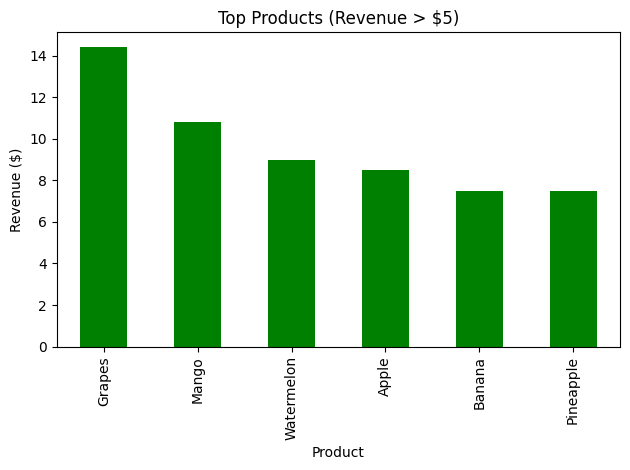

In [10]:
high_revenue_df.plot(kind='bar', x='product', y='revenue', legend=False, color='green')
plt.title("Top Products (Revenue > $5)")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("top_products_chart.png")
plt.show()



Products with Revenue > $5:
      product  total_qty  revenue
2      Grapes         18     14.4
3       Mango          9     10.8
6  Watermelon          3      9.0
0       Apple         17      8.5
1      Banana         25      7.5
5   Pineapple          5      7.5


<Figure size 640x480 with 0 Axes>

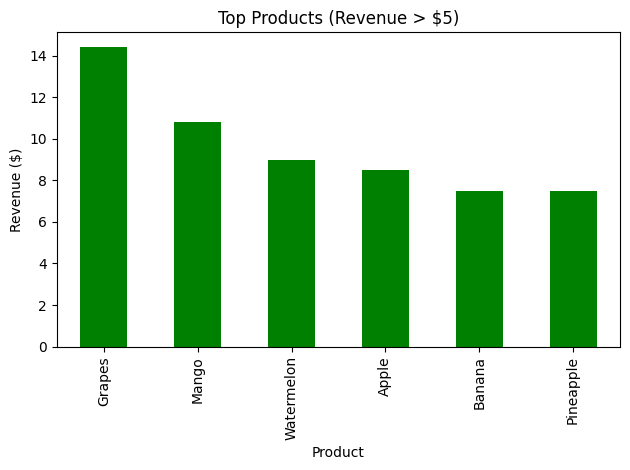

In [11]:
# Save the sorted chart
plt.savefig("revenue_chart_sorted.png")

# Export sorted summary to CSV
df.to_csv("sales_summary_sorted.csv", index=False)

# Filter products with revenue > $5
high_revenue_df = df[df['revenue'] > 5]
print("\nProducts with Revenue > $5:")
print(high_revenue_df)

# Plot chart for filtered products
high_revenue_df.plot(kind='bar', x='product', y='revenue', legend=False, color='green')
plt.title("Top Products (Revenue > $5)")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("top_products_chart.png")
plt.show()
